In [649]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

In [650]:
#Definition of global parameters
Niter=1000
M=30
delta=0.003   #1/((M/2)-1)
w_1=1.
m=np.arange(1,M+1)
epsilon=0.1
Delta=1.
g=np.arange(0,2,0.01) 

#colors for the plotting
c1='#140b34'
c2='#84206b'
c3='#e55c30'
c4='#f6d746'
colors=[c3, c2, c4, c1]

#Definition of final lists for 1st parametrization (f_m = -c_k/(W+w_k) ; l_m = c_k*epsilon_r/(w_k*(W+w_k))
epsilon_r_final_param1=[]
Delta_r_final_param1=[]
E_gs_final_param1=[]
sigma_x_med_param1=[]
eps_W1=[]

#Definition of final lists for 2nd parametrization (f_m = -c_k/w_k ; l_m = 0)
epsilon_r_final_param2=[]
Delta_r_final_param2=[]
E_gs_final_param2=[]
sigma_x_med_param2=[]
eps_W2=[]

#Definition of the difference of Egs between 1st and 2nd parametrization for the evaluation
deltaE_gs_12=[]

#Definition of real final lists (chosen between 1st and 2nd parametrization)
epsilon_r_final=[]
Delta_r_final=[]
E_gs_final=[]
sigma_x_med=[]


In [651]:
def eigenvalue(Del,eps): #def W
    return np.sqrt(Del**2 + eps**2)

#print(eigenvalue(Delta,epsilon))
#print(np.sqrt(1**2 + 0.1**2))

In [652]:
def coupling_m(n,coup): #def g_m
    return coup*np.sin(n*np.pi/2.)*np.sqrt(n)/(1.+delta*(n-1.))

#print(coupling_m(m,0.2))
#print(0.2*np.sin(3*np.pi/2.)*np.sqrt(3)/(1.+delta*(3-1.)))

In [653]:
def f_variational_param1(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(eigenvalue(Del,eps)+n*w_1)

#print(f_variational(m,0.2,Delta,epsilon))
#print(-coupling_m(3,0.2)/(eigenvalue(Delta,epsilon)+3*w_1))

In [654]:
def f_variational_param2(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(n*w_1)

In [655]:
def l_variational_param1(n,coup,Del,eps): #def l_m
    step=(coupling_m(n,coup)*eps)/(n*w_1*(eigenvalue(Del,eps)+n*w_1))
    #step=[x for x in step if math.isnan(x) == False]
    return step

#print(l_variational(m,0.2,Delta,epsilon)) #PROBLEMA - El primer término es un "nan" y entonces me dará problemas después
#print((coupling_m(3,0.2)*epsilon)/(3*w_1*(eigenvalue(Delta,epsilon)+3*w_1)))

In [656]:
def l_variational_param2(n,coup,Del,eps): #def l_m
    x=0
    return x

In [657]:
def energy_gs_param1(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param1(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param1(n,coup,Del,eps)**2)+(l_variational_param1(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

#print(energy_gs(m,0.83,0.08,0.22))
#print(-(eigenvalue(Delta,epsilon)/2)+2*np.nansum(coupling_m(m,0.2)*f_variational(m,0.2,Delta,epsilon))+np.nansum(m*w_1*((f_variational(m,0.2,Delta,epsilon)**2)+(l_variational(m,0.2,Delta,epsilon)**2))))

In [658]:
def energy_gs_param2(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param2(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param2(n,coup,Del,eps)**2)+(l_variational_param2(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

In [659]:
def f_Delta_r_param1(n,coup,Del,eps):
    f_m=f_variational_param1(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [660]:
def f_Delta_r_param2(n,coup,Del,eps):
    f_m=f_variational_param2(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [661]:
def f_epsilon_r_param1(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param1(n,coup,Del,eps)
    l_m=l_variational_param1(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [662]:
def f_epsilon_r_param2(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param2(n,coup,Del,eps)
    l_m=l_variational_param2(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [663]:
def er_relative(eps,Del):
    return eps/eigenvalue(Del,eps)

In [664]:
k=0
for i in range(np.size(g)):
    #Initialization
    g_aux=g[i]
    print("g",k,"=",g_aux)
    
    Delta_r_aux_1=deepcopy(Delta)
    epsilon_r_aux_1=deepcopy(epsilon)
    
    Delta_r_aux_2=deepcopy(Delta)
    epsilon_r_aux_2=deepcopy(epsilon)

    #It makes the process once to obtain 2 first values of each Delta_r and epsilon_r to compare the error
    Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
    Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
    #Assignments
    Delta_r_old_1=deepcopy(Delta_r_aux_1)
    epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
    Delta_r_aux_1=deepcopy(Delta_r_1)
    epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
    Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
    Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
    Delta_r_old_2=deepcopy(Delta_r_aux_2)
    epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
    Delta_r_aux_2=deepcopy(Delta_r_2)
    epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
    Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
    Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
    
    #Termalization until it arrives to Niter steps or until sqrt(abs(Ar'-Ar)**2) & sqrt(abs(er'-er)**2) is <10**(-3) :
    j=0
    while ((Err_Delta_1>=0.0001) and (Err_epsilon_1>=0.0001) and (Err_Delta_2>=0.0001) and (Err_epsilon_2>=0.0001)):
        #Repeats the process until it obtais stable values of each Delta_r and epsilon_r
        Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
        Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
        epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
        #Assignments
        Delta_r_old_1=deepcopy(Delta_r_aux_1)
        epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
        Delta_r_aux_1=deepcopy(Delta_r_1)
        epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
        Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
        Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
        Delta_r_old_2=deepcopy(Delta_r_aux_2)
        epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
        Delta_r_aux_2=deepcopy(Delta_r_2)
        epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
        Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
        Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
        
        j=j+1
        if (j==Niter):
            print("He llegado hasta la iteración 1000 antes de una solución") #ahota 10000 que no lo he cambiado
            break
            
    E_gs_1=deepcopy(energy_gs_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    sigma_x_1=deepcopy(0.5*epsilon_r_aux_1/eigenvalue(Delta_r_aux_1,epsilon_r_aux_1))
    print("E_gs_1 = ",E_gs_1)
    print("Delta_r_1 =",Delta_r_aux_1)
    print("epsilon_r_1 =",epsilon_r_aux_1)
    print("sigma_x_1=",sigma_x_1)
    print("\n")
    Delta_r_final_param1.append(Delta_r_aux_1)
    epsilon_r_final_param1.append(epsilon_r_aux_1)
    E_gs_final_param1.append(E_gs_1)
    sigma_x_med_param1.append(sigma_x_1)
    eps_W1.append(er_relative(epsilon_r_aux_1,Delta_r_aux_1))
    
    
    E_gs_2=deepcopy(energy_gs_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    sigma_x_2=deepcopy(0.5*epsilon_r_aux_2/eigenvalue(Delta_r_aux_2,epsilon_r_aux_2))
    print("E_gs_2 = ",E_gs_2)
    print("Delta_r_2 =",Delta_r_aux_2)
    print("epsilon_r_2 =",epsilon_r_aux_2)
    print("sigma_x_2=",sigma_x_2)
    print("\n")
    Delta_r_final_param2.append(Delta_r_aux_2)
    epsilon_r_final_param2.append(epsilon_r_aux_2)
    E_gs_final_param2.append(E_gs_2)
    sigma_x_med_param2.append(sigma_x_2)
    eps_W2.append(er_relative(epsilon_r_aux_2,Delta_r_aux_2))
    
    #Now it makes the comparison between the energies in order to choose the values of one of the two parametrizations
    comparison=deepcopy(E_gs_1-E_gs_2)
    deltaE_gs_12.append(comparison)
    print("deltaE_gs_12 =",comparison)
    print("\n")
    
    if(comparison<0):
        print("E_gs = ",E_gs_1)
        print("Delta_r =",Delta_r_aux_1)
        print("epsilon_r =",epsilon_r_aux_1)
        print("sigma_x=",sigma_x_1)
        print("\n")
        Delta_r_final.append(Delta_r_aux_1)
        epsilon_r_final.append(epsilon_r_aux_1)
        #E_gs_final.append(E_gs_1)
        sigma_x_med.append(sigma_x_1)
    else:
        print("E_gs = ",E_gs_2)
        print("Delta_r =",Delta_r_aux_2)
        print("epsilon_r =",epsilon_r_aux_2)
        print("sigma_x=",sigma_x_2)
        print("\n")
        Delta_r_final.append(Delta_r_aux_2)
        epsilon_r_final.append(epsilon_r_aux_2)
        #E_gs_final.append(E_gs_2)
        sigma_x_med.append(sigma_x_2)
            
    k=k+1



g 0 = 0.0
E_gs_1 =  -0.5024937810560445
Delta_r_1 = 1.0
epsilon_r_1 = 0.1
sigma_x_1= 0.049751859510499465


E_gs_2 =  -0.5024937810560445
Delta_r_2 = 1.0
epsilon_r_2 = 0.1
sigma_x_2= 0.049751859510499465


deltaE_gs_12 = 0.0


E_gs =  -0.5024937810560445
Delta_r = 1.0
epsilon_r = 0.1
sigma_x= 0.049751859510499465


g 1 = 0.01
E_gs_1 =  -0.5037195072722483
Delta_r_1 = 0.9997597985150405
epsilon_r_1 = 0.10001562404895993
sigma_x_1= 0.04977139252835085


E_gs_2 =  -0.5036525591271669
Delta_r_2 = 0.9995471365147633
epsilon_r_2 = 0.1
sigma_x_2= 0.04977417719049965


deltaE_gs_12 = -6.694814508145797e-05


E_gs =  -0.5037195072722483
Delta_r = 0.9997597985150405
epsilon_r = 0.10001562404895993
sigma_x= 0.04977139252835085


g 2 = 0.02
E_gs_1 =  -0.5073969975609939
Delta_r_1 = 0.9990395401852503
epsilon_r_1 = 0.1000624961958397
sigma_x_1= 0.049830029462229336


E_gs_2 =  -0.5071295114223601
Delta_r_2 = 0.9981897761996106
epsilon_r_2 = 0.1
sigma_x_2= 0.04984118911126884


deltaE_gs_12 = -0.000

Delta_r = 0.839349647341588
epsilon_r = 0.11138993169178515
sigma_x= 0.06577819357479733


g 28 = 0.28
E_gs_1 =  -1.4782417272720827
Delta_r_1 = 0.8283325415808523
epsilon_r_1 = 0.11224925438458101
sigma_x_1= 0.06714247022214999


E_gs_2 =  -1.439213795544072
Delta_r_2 = 0.7010855284723359
epsilon_r_2 = 0.1
sigma_x_2= 0.0706033776898232


deltaE_gs_12 = -0.03902793172801067


E_gs =  -1.4782417272720827
Delta_r = 0.8283325415808523
epsilon_r = 0.11224925438458101
sigma_x= 0.06714247022214999


g 29 = 0.29
E_gs_1 =  -1.5502432517301534
Delta_r_1 = 0.8170673806872141
epsilon_r_1 = 0.11313982517529672
sigma_x_1= 0.06858094152111978


E_gs_2 =  -1.5092636588654162
Delta_r_2 = 0.6832158374392829
epsilon_r_2 = 0.1
sigma_x_2= 0.07241177984066857


deltaE_gs_12 = -0.04097959286473718


E_gs =  -1.5502432517301534
Delta_r = 0.8170673806872141
epsilon_r = 0.11313982517529672
sigma_x= 0.06858094152111978


g 30 = 0.3
E_gs_1 =  -1.624909006417113
Delta_r_1 = 0.8055682869048273
epsilon_r_1 = 0.1140

E_gs_1 =  -5.648844088066936
Delta_r_1 = 0.3853997347108101
epsilon_r_1 = 0.16201185032194132
sigma_x_1= 0.19376259000319737


E_gs_2 =  -5.590186584218019
Delta_r_2 = 0.16565925389254446
epsilon_r_2 = 0.1
sigma_x_2= 0.2583953849158085


deltaE_gs_12 = -0.058657503848917436


E_gs =  -5.648844088066936
Delta_r = 0.3853997347108101
epsilon_r = 0.16201185032194132
sigma_x= 0.19376259000319737


g 64 = 0.64
E_gs_1 =  -5.819431668401225
Delta_r_1 = 0.37381903426488183
epsilon_r_1 = 0.16399610453985178
sigma_x_1= 0.2008722350725715


E_gs_2 =  -5.762032121349162
Delta_r_2 = 0.15639835369906965
epsilon_r_2 = 0.1
sigma_x_2= 0.26934540033473475


deltaE_gs_12 = -0.057399547052062516


E_gs =  -5.819431668401225
Delta_r = 0.37381903426488183
epsilon_r = 0.16399610453985178
sigma_x= 0.2008722350725715


g 65 = 0.65
E_gs_1 =  -5.992917733640458
Delta_r_1 = 0.3624121503691469
epsilon_r_1 = 0.16601160685568206
sigma_x_1= 0.2082299531455316


E_gs_2 =  -5.936871836210962
Delta_r_2 = 0.14752146346939

sigma_x_2= 0.4718120330904765


deltaE_gs_12 = -0.01193044699335033


E_gs =  -10.30161453114612
Delta_r = 0.16918819909782304
epsilon_r = 0.21555546610760346
sigma_x= 0.3933158482753192


g 87 = 0.87
E_gs_1 =  -10.538123736714988
Delta_r_1 = 0.16230087260310783
epsilon_r_1 = 0.21825842657767042
sigma_x_1= 0.4012257612095772


E_gs_2 =  -10.528708086263409
Delta_r_2 = 0.032435554406504155
epsilon_r_2 = 0.1
sigma_x_2= 0.4756070519429125


deltaE_gs_12 = -0.009415650451579438


E_gs =  -10.538123736714988
Delta_r = 0.16230087260310783
epsilon_r = 0.21825842657767042
sigma_x= 0.4012257612095772


g 88 = 0.88
E_gs_1 =  -10.77743370627351
Delta_r_1 = 0.1556191290996
epsilon_r_1 = 0.22099263514565728
sigma_x_1= 0.40881108147388245


E_gs_2 =  -10.770554977509926
Delta_r_2 = 0.029963684120510207
epsilon_r_2 = 0.1
sigma_x_2= 0.47896098911506885


deltaE_gs_12 = -0.006878728763583197


E_gs =  -10.77743370627351
Delta_r = 0.1556191290996
epsilon_r = 0.22099263514565728
sigma_x= 0.40881108147388


g 116 = 1.16
E_gs_1 =  -18.58138076476645
Delta_r_1 = 0.039457172825570735
epsilon_r_1 = 0.31023720280474737
sigma_x_1= 0.49600447296787437


E_gs_2 =  -18.674268137800503
Delta_r_2 = 0.0022538592987991967
epsilon_r_2 = 0.1
sigma_x_2= 0.4998730513208042


deltaE_gs_12 = 0.0928873730340527


E_gs =  -18.674268137800503
Delta_r = 0.0022538592987991967
epsilon_r = 0.1
sigma_x= 0.4998730513208042


g 117 = 1.17
E_gs_1 =  -18.898396922723528
Delta_r_1 = 0.037309283485533154
epsilon_r_1 = 0.3138776062124099
sigma_x_1= 0.496504731273185


E_gs_2 =  -18.996757659676977
Delta_r_2 = 0.002028107108260919
epsilon_r_2 = 0.1
sigma_x_2= 0.49989720125037723


deltaE_gs_12 = 0.09836073695344894


E_gs =  -18.996757659676977
Delta_r = 0.002028107108260919
epsilon_r = 0.1
sigma_x= 0.49989720125037723


g 118 = 1.18
E_gs_1 =  -19.217990693870256
Delta_r_1 = 0.03526137080514668
epsilon_r_1 = 0.31754925771799214
sigma_x_1= 0.4969456243415773


E_gs_2 =  -19.322015797305745
Delta_r_2 = 0.0018233142749637477

E_gs =  -35.0410673138434
Delta_r = 1.0634204265081002e-05
epsilon_r = 0.1
sigma_x= 0.4999999971728425


g 160 = 1.6
E_gs_1 =  -34.8973624714019
Delta_r_1 = 0.002133702273169023
epsilon_r_1 = 0.4999756533740737
sigma_x_1= 0.499995446933399


E_gs_2 =  -35.482590610834485
Delta_r_2 = 9.203459544302603e-06
epsilon_r_2 = 0.1
sigma_x_2= 0.4999999978824083


deltaE_gs_12 = 0.5852281394325871


E_gs =  -35.482590610834485
Delta_r = 9.203459544302603e-06
epsilon_r = 0.1
sigma_x= 0.4999999978824083


g 161 = 1.61
E_gs_1 =  -35.32264679206135
Delta_r_1 = 0.0019753482043419496
epsilon_r_1 = 0.5049909730902095
sigma_x_1= 0.49999617479144226


E_gs_2 =  -35.92688207898457
Delta_r_2 = 7.957997086509954e-06
epsilon_r_2 = 0.1
sigma_x_2= 0.499999998416757


deltaE_gs_12 = 0.6042352869232204


E_gs =  -35.92688207898457
Delta_r = 7.957997086509954e-06
epsilon_r = 0.1
sigma_x= 0.499999998416757


g 162 = 1.62
E_gs_1 =  -35.750261325863214
Delta_r_1 = 0.001827868053538084
epsilon_r_1 = 0.5100375409042652

E_gs_2 =  -44.89437249156985
Delta_r_2 = 4.2291259624575593e-07
epsilon_r_2 = 0.1
sigma_x_2= 0.4999999999955286


deltaE_gs_12 = 1.0558809166609322


E_gs =  -44.89437249156985
Delta_r = 4.2291259624575593e-07
epsilon_r = 0.1
sigma_x= 0.4999999999955286


g 181 = 1.81
E_gs_1 =  -44.309154892919494
Delta_r_1 = 0.00038196327153421295
epsilon_r_1 = 0.6118594679760946
sigma_x_1= 0.49999990257291227


E_gs_2 =  -45.39402738260233
Delta_r_2 = 3.5911575799474206e-07
epsilon_r_2 = 0.1
sigma_x_2= 0.49999999999677586


deltaE_gs_12 = 1.0848724896828372


E_gs =  -45.39402738260233
Delta_r = 3.5911575799474206e-07
epsilon_r = 0.1
sigma_x= 0.49999999999677586


g 182 = 1.82
E_gs_1 =  -44.782017619799895
Delta_r_1 = 0.000350065697317299
epsilon_r_1 = 0.6175309977485474
sigma_x_1= 0.4999999196619119


E_gs_2 =  -45.89645044477629
Delta_r_2 = 3.046666118341112e-07
epsilon_r_2 = 0.1
sigma_x_2= 0.4999999999976794


deltaE_gs_12 = 1.1144328249763973


E_gs =  -45.89645044477629
Delta_r = 3.0466661183411

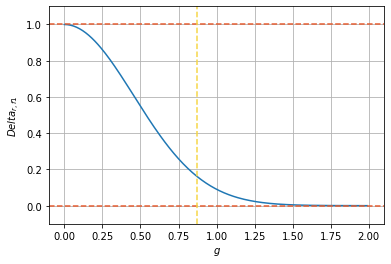

In [665]:
#Delta_r 1st parametrization
plt.plot(g,Delta_r_final_param1)
#np.save("Delta_r_p1_M10",Delta_r_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f1}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

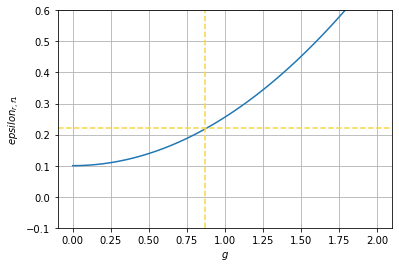

In [666]:
#epsilon_r 1st parametrization
plt.plot(g,epsilon_r_final_param1)
#np.save("epsilon_r_p1_M10",epsilon_r_final_param1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f1}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.axhline(0.22,c=c4,linestyle='--')
plt.grid()
plt.show()

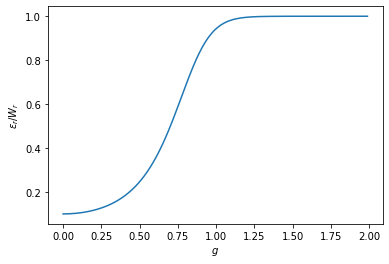

In [684]:
plt.plot(g,eps_W1)
np.save("er_Wr_p1_M30",eps_W1)
plt.xlabel('$g$')
plt.ylabel('$\epsilon_r / W_r$')
plt.show()

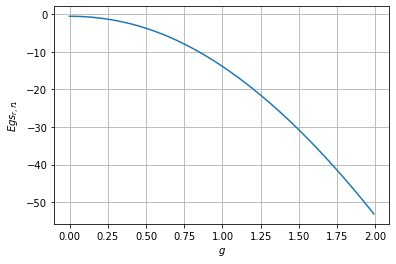

In [668]:
#E_gs 1st parametrization
plt.plot(g,E_gs_final_param1)
#np.save("EGS_p1_M10",E_gs_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f1}$')
plt.grid()
plt.show()

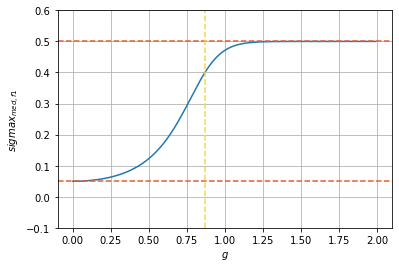

In [669]:
#sigma_x_med 1st parametrization
plt.plot(g,sigma_x_med_param1)
#np.save("sigma_x_p1_M10",sigma_x_med_param1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f1}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3, linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

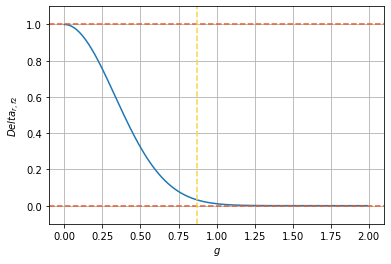

In [670]:
#Delta_r 2nd parametrization
plt.plot(g,Delta_r_final_param2)
#np.save("Delta_r_p2_M1000",Delta_r_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f2}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

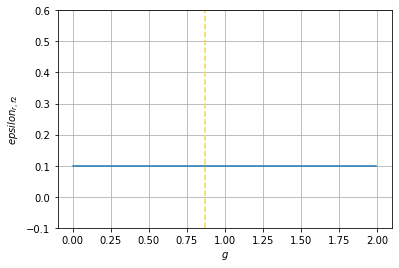

In [671]:
#epsilon_r 2nd parametrization
plt.plot(g,epsilon_r_final_param2)
#np.save("epsilon_r_p2_M1000",epsilon_r_final_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f2}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

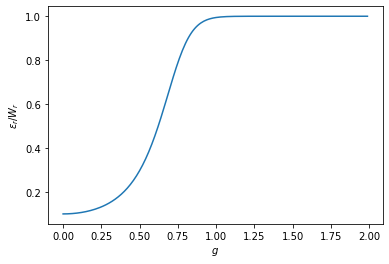

In [685]:
plt.plot(g,eps_W2)
np.save("er_Wr_p2_M30",eps_W2)
plt.xlabel('$g$')
plt.ylabel('$\epsilon_r / W_r$')
plt.show()

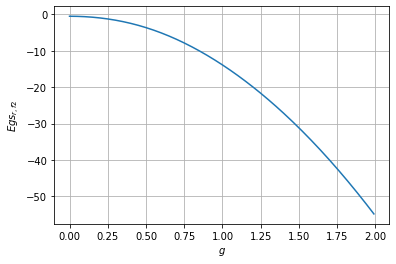

In [673]:
#E_gs 2nd parametrization
plt.plot(g,E_gs_final_param2)
#np.save("EGS_p2_M1000",E_gs_final_param2)
#np.save("EGS_p2_M10_renormalized_prueba",E_gs_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f2}$')
plt.grid()
plt.show()

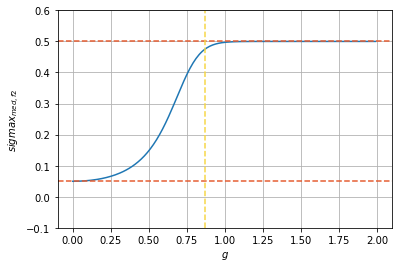

In [674]:
#sigma_x_med 2nd parametrization
plt.plot(g,sigma_x_med_param2)
#np.save("sigma_x_p2_M1000",sigma_x_med_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f2}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

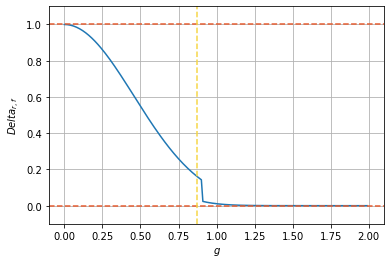

In [675]:
#Delta_r final
plt.plot(g,Delta_r_final)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

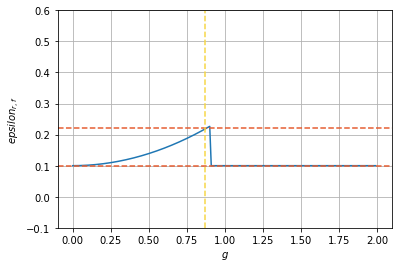

In [676]:
#epsilon_r
plt.plot(g,epsilon_r_final)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f}$')
plt.axhline(0.22,c=c3,linestyle='--')
plt.axhline(0.1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

In [677]:
#E_gs
#plt.plot(g,E_gs_final)
#plt.xlabel('$g$')
#plt.ylabel('$Egs_{r,f}$')
#plt.grid()
#plt.show()

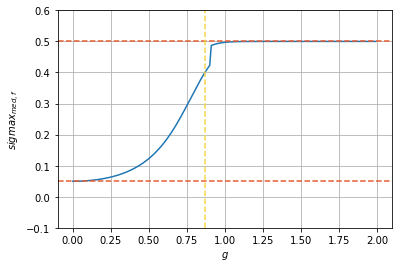

In [678]:
#sigma_x_med
plt.plot(g,sigma_x_med)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4, linestyle='--')
plt.grid()
plt.show()

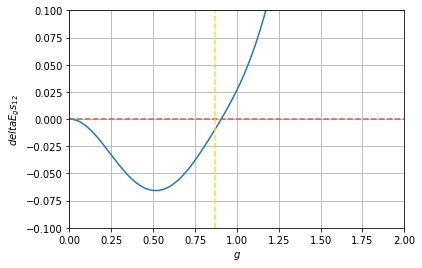

In [679]:
plt.plot(g,deltaE_gs_12)
plt.xlim(0,2)
plt.ylim(-0.1,0.1)
plt.xlabel('$g$')
plt.ylabel('$deltaE_gs_{12}$')
plt.axhline(0,c=c3,linestyle='--')
plt.axvline(0.87,c=c4, linestyle='--')
plt.grid()
plt.show()

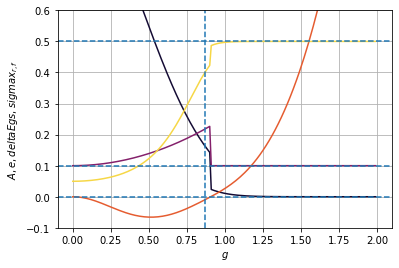

-0.06572965724904245


In [680]:
plt.plot(g,Delta_r_final,c=c1)
plt.plot(g,epsilon_r_final,c=c2)
plt.plot(g,deltaE_gs_12,c=c3)
plt.plot(g,sigma_x_med,c=c4)
plt.xlabel('$g$')
plt.ylabel('$A,e,deltaEgs,sigmax_{r,f}$')
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,1.1)
plt.ylim(-0.1,0.6)
plt.axhline(0,linestyle='--')
plt.axhline(1,linestyle='--')
plt.axhline(0.5,linestyle='--')
plt.axhline(0.1, linestyle='--')
plt.axvline(0.87, linestyle='--')
plt.grid()
plt.show()
print(np.min(deltaE_gs_12))

In [681]:
Ar1=[]
Ar1_1=[]
Ar1_2=[]

Ar2=[]
Ar2_1=[]
Ar2_2=[]

Ars=np.arange(0,1,0.01)

for i in range(np.size(Ars)):
    
    Ar_local=Ars[i]
    
    res1=f_Delta_r_param1(m,0.2,Ar_local,epsilon)
    res1_1=f_Delta_r_param1(m,0.5,Ar_local,epsilon)
    res1_2=f_Delta_r_param1(m,0.8,Ar_local,epsilon)
    
    res2=f_Delta_r_param2(m,0.2,Ar_local,epsilon)
    res2_1=f_Delta_r_param2(m,0.5,Ar_local,epsilon)
    res2_2=f_Delta_r_param2(m,0.8,Ar_local,epsilon)
    
    Ar1.append(res1)
    Ar1_1.append(res1_1)
    Ar1_2.append(res1_2)
    
    Ar2.append(res2)
    Ar2_1.append(res2_1)
    Ar2_2.append(res2_2)

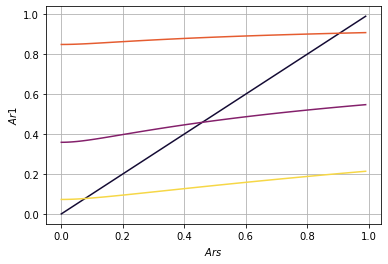

In [682]:
plt.plot(Ars,Ars,c=c1)
plt.plot(Ars,Ar1,c=c3)
plt.plot(Ars,Ar1_1,c=c2)
plt.plot(Ars,Ar1_2,c=c4)
#plt.ylim(0.8,1) #para Ar1 - g=0.2
#plt.ylim(0.2,0.5) #para Ar1_1 - g=0.5
#plt.ylim(0,0.2) #para Ar1_2 - g=0.8
plt.xlabel('$Ars$')
plt.ylabel('$Ar1$')
plt.grid()
plt.show()

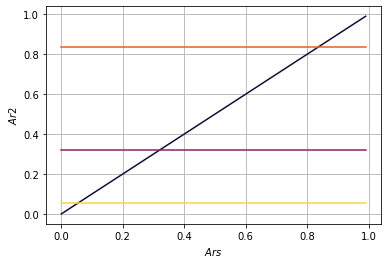

In [683]:
plt.plot(Ars,Ars,c=c1)
plt.plot(Ars,Ar2,c=c3)
plt.plot(Ars,Ar2_1,c=c2)
plt.plot(Ars,Ar2_2,c=c4)
plt.xlabel('$Ars$')
plt.ylabel('$Ar2$')
plt.grid()
plt.show()